# Evaluation of Data Science techniques for predicting buying and selling shares for maximum profit

This evaluation will test multiple Data Science techniques including neural networks, decision trees, time series models, and combination of different models to determine which model bests predicts when to buy and sell shares for maximum profit.

## Methodology
To start evaluation a ground truth to evaluate the models against.
The data used for this evaluation is the history of JSE:PAN from 2023 to 2025 from Google Finance Sheets and exported to a CSV.
The ground truth is taken to the total profit from buying on local minimums and selling on local maximums.

## Ground Truth Data Generation
Loading the input data from extracted Google Finance Sheet (CSV)

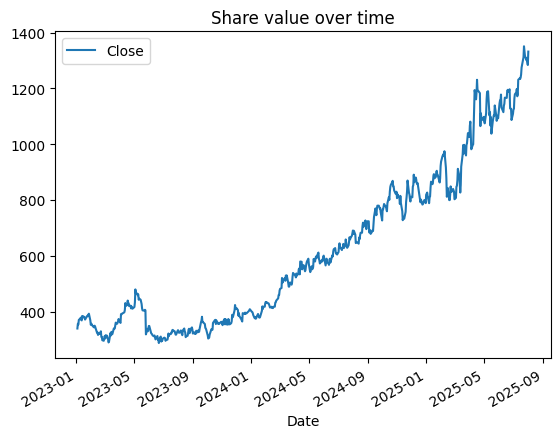

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('JSE PAN 2023 - 2025.csv', parse_dates=['Date'])

df.plot(x='Date', y='Close')
plt.title('Share value over time')
plt.show()

Extracting local min and maxs

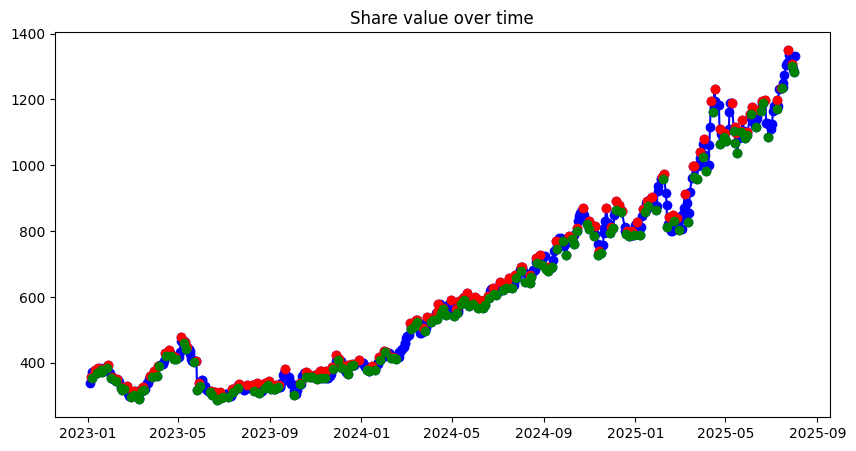

In [48]:
from scipy.signal import argrelextrema
import numpy as np

local_max_indices = argrelextrema(df['Close'].to_numpy(), np.greater)[0]
local_min_indices = argrelextrema(df['Close'].to_numpy(), np.less)[0]

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], color='blue', marker='o')
plt.title('Share value over time')
plt.scatter(df.loc[local_max_indices, 'Date'], df.loc[local_max_indices, 'Close'], color='red', label='Local Minima', zorder=5)
plt.scatter(df.loc[local_min_indices, 'Date'], df.loc[local_min_indices, 'Close'], color='green', label='Local Maxima', zorder=5)
plt.show()

Generate profit results

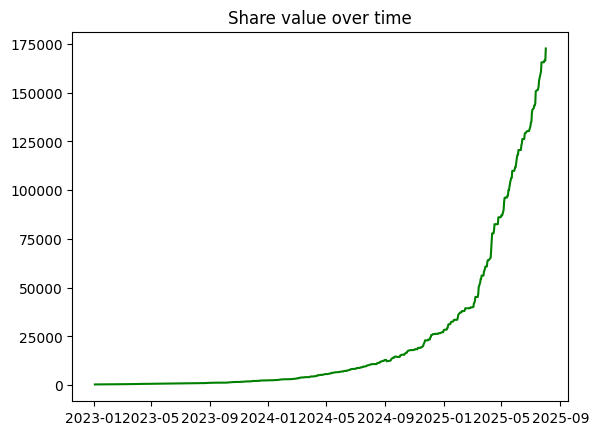

In [53]:
profit = 0
share_count = 1
next_max = -1
next_min = -1
temp_local_max_indices = local_max_indices
temp_local_min_indices = local_min_indices

total_value = []

def pop(arr: np.array):
    if len(arr) > 0:
        value = arr[0]
        arr = arr[1:]
        return [arr, value]
    return [[], -1]

def pop_max():
    global temp_local_max_indices, next_max
    temp_local_max_indices, next_max = pop(temp_local_max_indices)

def pop_min():
    global temp_local_min_indices, next_min
    temp_local_min_indices, next_min = pop(temp_local_min_indices)

pop_max()
pop_min()
for i in range(len(df['Close'])):
    close = df['Close'][i]

    while next_max != -1 and i > next_max:
        pop_max()

    while next_min != -1 and i > next_min:
        pop_min()

    if i == next_max and share_count > 0:
        profit += share_count * close
        share_count = 0
        pop_max()

    if i == next_min and profit >= close:
        shares = int(profit/close)
        share_count = shares
        profit -= shares * close
        pop_min()

    total_value.append(profit + share_count*close)

value_df = pd.DataFrame(total_value, columns=['Value'])

plt.plot(df.loc[value_df.index, 'Date'], value_df['Value'], color='green')
plt.title('Share value over time')
plt.show()